For this lab, we'll use the NHIS dataset, which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the pandas library to import the data into our Python environment. This process will be covered in detail in a later section. For now, we'll do this part for you to give you a head start.

Run the cell below to import the data.

In [5]:
import pandas as pd
df = pd.read_csv('nhis.csv')
height = list(df['height'])

We are only interested in the height column, so we saved it as a list in the variable height in the cell above.

In the cells below:

- Display the number of items in height
- Slice and display the first 10 items from height

In [6]:
num_records = len(height)
num_records

4785

In [7]:
first_10 = height[0:10]
first_10

[74, 70, 61, 68, 66, 98, 99, 70, 65, 64]

Plotting Histograms

We'll begin by importing the pyplot module from the library matplotlib and setting an alias of plt for it (so that we only have to type plt. instead of matplotlib.pyplot. each time we want to use it). Note that plt is considered the standard alias for Matplotlib.

Run the cell below to import Matplotlib and use it to create a histogram of our height data with 8 different bins.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# The above is used so that the plot is run in the notebook directly and not a separate window

Next, we'll use Matplotlib to create a histogram by passing in our data, as well as the parameter bins=8, into the hist function.

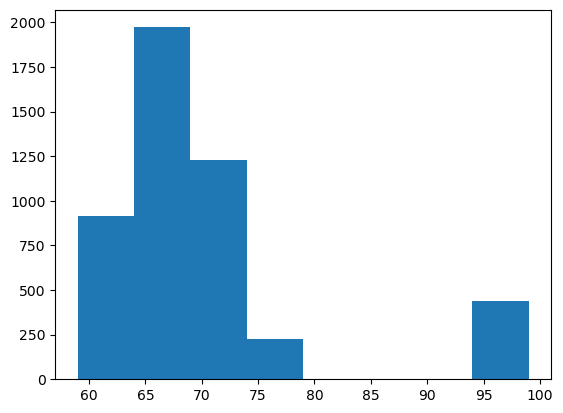

In [9]:
plt.hist(height, bins=8);

Using the Python skills you have learned so far, create a function get_mean() to perform the following tasks:

- Input a list of numbers (like the height list we have above)
- Calculate the sum of numbers and length of the list
- Calculate mean from above, round off to 2 decimals and return it.

In [10]:
def get_mean(lst):
    '''
    This function calculates the mean of a list
    '''
    total = 0
    length = len(lst)
    for item in lst:
        total += item
    mean = total/length
    return round(mean,2)

mean = get_mean(height)
print("Sample mean:", mean)

Sample mean: 69.58


So, we have our mean length, 69.58, and this confirms our observations from the histogram. But we also have some outliers in our data above and we know outliers affect the mean calculation by pulling the mean value in their direction. So, let's remove these outliers and create a new list to see if our mean shifts or stays. We'll use a threshold of 80 inches, i.e. filter out any values greater than 80.

Perform following tasks:

- Create a function filter_height_outliers that takes a list as an argument
- Perform a for loop to iteratively check and append values to a new list if the value is less than 80, for every element in the original list
- Return the new list

In [11]:
def filter_height_outliers(lst):
    '''
    This function removes items greater than 80
    '''
    filtered_list = []
    for item in lst:
        if item < 80:
            filtered_list.append(item)
        else:
            continue

    return filtered_list

filter_height_outliers(height)
# Append the cleaned heights to a new list - filtered_height
filtered_height = filter_height_outliers(height)
len(filtered_height)

4347

Now that we have filtered the outliers out of our data and reduced the size of the dataset from 4785 to 4347, let's recreate our histogram with 8 bins using our filtered data.

(array([342., 575., 817., 794., 667., 515., 409., 228.]),
 array([59.   , 61.125, 63.25 , 65.375, 67.5  , 69.625, 71.75 , 73.875,
        76.   ]),
 <BarContainer object of 8 artists>)

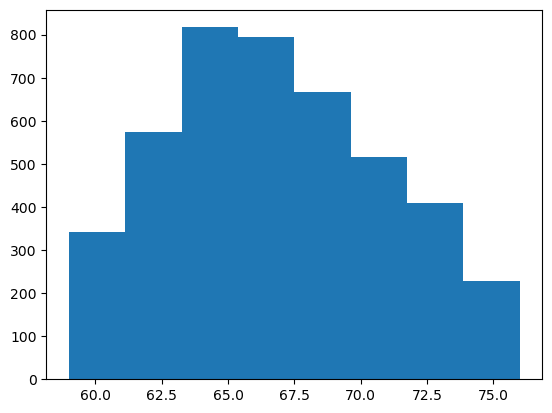

In [12]:
plt.hist(filtered_height, bins = 8)

Since we've filtered our data to remove outliers, we should also recalculate the mean. Do this now in the cell below, using our get_mean() function.

In [13]:
new_mean = get_mean(filtered_height)
print('New sample mean:',new_mean)

New sample mean: 66.85


# Calculating the Median

The median is the value directly in the middle of the dataset. In statistical terms, this is the Median Quartile. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.

If the dataset has an odd number of values, then the median is the middle number. If the dataset has an even number of values, then we take the mean of the middle two numbers.

In the cell below, write a function that takes in a list of numbers and returns the median value for that dataset. Make sure you first check for even / odd number of data points and perform the computation accordingly. The best approach to calculate the median is as follows:

- Sort the data
- Check if the data has even or odd number of data points
- Calculate the median of the sorted data now that you know if the count is even or odd.

Hints:

- You can use the modulo operator % in Python to check if a value is even or odd -- odd numbers % 2 (e.g. 5 % 2) will equal 1, while even numbers % 2 (e.g. 4 % 2) will equal 0!
- You can use integer division // to calculate the index -- for even numbers this just means that the result is an integer (e.g. 4 // 2 is 2 rather than 2.0), while for odd numbers this means that the remainder is cut off (e.g. 7 // 2 is 3, not 3.5)

In [14]:
def get_median(lst):
    '''
    Captures the median of the list
    '''
    data_sorted = sorted(lst)
    length = len(data_sorted)
    median = length // 2
    
    if length % 2 == 0:
        return (data_sorted[median -1] + data_sorted[median])/2
    else:
        return data_sorted[median]

get_median(height)

67

So, we have 67, which is much closer to the filtered list mean (66.85) than the mean we calculated with actual list (69.58). So, median in this case seems to be a much better indicator of the central tendency found in the dataset. This makes sense because we've already learned that medians are less sensitive to outliers than mean values are!

# Calculating the Mode
The mode is the value that shows up the most in a dataset. A dataset can have 0 or more modes. If no value shows up more than once, the dataset is considered to have no mode value. If two numbers show up the same number of times, that dataset is considered bimodal. Datasets where multiple values all show up the same number of times are considered multimodal.

In the cell below, write a function that takes in a list of numbers and returns another list containing the mode value(s). In the case of only one mode, the list would have a single element.

Hint: Building a frequency distribution table using dictionaries is probably the easiest way to approach this problem. Use each unique element from the height list as a key, and the frequency of this element as the value and build a dictionary. You can then simply identify the keys (heights) with maximum values.

In [15]:
def get_mode(lst):
    '''
    Calculate the mode
    '''
    frequency_dict = {}
    for item in lst:
        if item not in frequency_dict:
            frequency_dict[item] = 1
        else:
            frequency_dict[item] +=1
            
    highest_freq = max(frequency_dict.values())
    
    modes = []
    
    for height, frequency in frequency_dict.items():
        if frequency == highest_freq:
            modes.append(height)
        
    return modes

test1 = [1, 2, 3, 5, 5, 4]
test2 = [1, 1, 1, 2, 3, 4, 5, 5, 5]

print(get_mode(test1))
print(get_mode(test2))

[5]
[1, 5]


In [16]:
mode = get_mode(height)
mode

[64]

So, the mode value is much lower than our mean and median calculated earlier. What do you make of this? The answer to that could be subjective and depends on the problem. i.e. if your problem is to identify sizes for garments that would sell the most, you cannot disregard mode. However, if you want to get an idea about the general or typical height of individuals, you can probably still do that with the median and the average.

# Measures of Dispersion

In the cell below, write a function that takes a list of numbers as input and returns the variance (rounded to two decimal places) of the sample as output.

In [17]:
def get_variance(lst):
    """
    Calculating sample mean
    """
    sample_lst_mean = get_mean(lst)
    sum_of_squares = 0
    for item in lst:
        diff = item - sample_lst_mean
        diff_squared = diff ** 2
        sum_of_squares += diff_squared

    variance = sum_of_squares/(len(lst) -1)
    return round(variance, 2)


In [18]:
variance = get_variance(height)
print(f"The variance is: {variance}")

The variance is: 87.74


In the cell below, write a function that takes a list of numbers as input and returns the standard deviation of that sample as output.

In [19]:
def get_stddev(lst):
    stddev = get_variance(lst) ** 0.5
    
    return round(stddev, 2)

In [20]:
standard_deviation = get_stddev(height)
print(f"The standard deviation is {standard_deviation}")

The standard deviation is 9.37


So 9.37 inches is the amount of deviation present in our dataset. As we are still including outlier values, this might be slightly affected but these results are now much more reliable.

# Simplifying the Process with NumPy
We hope writing these functions was a useful experience in terms of deepening your understanding of these statistical measures as well as sharpening your Python skills. However in reality there is almost never a need to write these kinds of functions "by hand", since libraries like NumPy and SciPy can typically handle them for us in a single line.

Below is a demonstration of the same calculations performed above, written using Python libraries side-by-side with the results of the functions you've just written:

In [21]:
import numpy as np
from scipy import stats as st
print(f"Mean: {round(np.mean(height),2)}")
print(f"Median: {round(np.median(height),2)}")
print(f"Mode: {st.mode(height)[0]}") # Used Scipy library
print(f"Variance: {round(np.var(height),2)}")
print(f"Standard Deviation: {round(np.std(height),2)}\n")

print("The crap you did above was honestly useless. These are the shortcuts.")
print("But at least you have experience in writing fucntions")

Mean: 69.58
Median: 67.0
Mode: 64
Variance: 87.73
Standard Deviation: 9.37

The crap you did above was honestly useless. These are the shortcuts.
But at least you have experience in writing fucntions


# Covariance and Correlation

**The Data**

The two variables include 20 heights (in inches) and weights (in pounds). This will help us focus more on seeing covariance and correlation in action!

At this point, you should be able to calculate the average height and average weight. You can also explain the medians, variances, and standard deviations for this dataset.

But all of those measurements are only concerned with a single variable. Now that we have both heights and weights, we want to perform statistical analysis for multiple variables. In this lab, you'll answer the following questions:

Is there a linear relationship between weight an height?
Does weight increase as height increases?
How strong is the linear relationship between weight and height?
There are always exceptions, but when you look at the population in general, taller people will tend to weigh more than shorter people. While you should always be cautious when generalizing, generalization of information can be very useful as it shows you a bigger picture that you can build your intuitions upon. This is also what a lot of core statistical principles are built upon.

First, run the below cells to load the heights and weights into memory.

In [24]:
height = [68, 71, 61, 69, 71, 58, 72, 73, 58, 74,
          61, 59, 69, 68, 64, 69, 72, 66, 65, 69]
weight = [165, 201, 140, 170, 192, 125, 195, 205,
          115, 210, 135, 125, 172, 175, 145, 170,
          200, 155, 150, 171]

In [26]:
covariance_matrix = np.cov(height, weight)
covariance_matrix[0][1]

144.75789473684205

In [27]:
correlation_matrix = np.corrcoef(height, weight)
correlation_matrix[0][1]

0.9773995748246294

**Covariance**

In stats, when trying to figure out how two variables vary together, you can use the covaiance between these two varibales. This gives you an idea of how the variables change together

Covariance values range from positive infinity to negative infinity
- A positive covariance indicates that the two variables are positively related
- A negative covariance indicates that the two variables are negatively related
- A covariance equal or close to zero indicates no linear relationship between the two variables

**Correlation**

It refers to a relationship or association between variables.

- If two variables have a correlation of +0.9, this means the change in one item results in an almost similar change to another item.
- A correlation value of -0.9 means that the change is one variable results in an opposite change in the other variable.
- A correlation near 0 would be no effect.

Causation is when any change in the value of one variable leads to a change in the value of another variable, which means one variable causes the change in another. This is also referred to as cause and effect.